In [1]:
import torch
from torch.backends import cudnn

from my_utils import data, models
from my_utils.utils import save_model, check_accuracy, train
from my_utils.vis import *

In [2]:
print(torch.cuda.get_device_properties(0))
print(cudnn.is_available())
a = torch.tensor(1.)
a.cuda(device='cuda:1')

_CudaDeviceProperties(name='Tesla V100-SXM2-32GB', major=7, minor=0, total_memory=32510MB, multi_processor_count=80)
True


tensor(1., device='cuda:1')

In [3]:
import os

In [43]:
# from scipy.io import loadmat
import h5py

ROOT = '/home/wangyh/02-Datasets/Z-NLOS'
PATH = os.path.join(ROOT, os.listdir(ROOT)[0])

file = h5py.File(PATH, mode='r')
for key in file.keys():
    print(file[key], '\n')

<HDF5 dataset "cameraGridNormals": shape (3, 256), type "<f4"> 

<HDF5 dataset "cameraGridPoints": shape (1, 2), type "<f4"> 

<HDF5 dataset "cameraGridPositions": shape (3, 256), type "<f4"> 

<HDF5 dataset "cameraGridSize": shape (1, 2), type "<f8"> 

<HDF5 dataset "cameraPosition": shape (3, 1), type "<f8"> 

<HDF5 dataset "data": shape (1024, 6, 256, 256), type "<f4"> 

<HDF5 dataset "deltaT": shape (1, 1), type "<f8"> 

<HDF5 dataset "hiddenVolumePosition": shape (3, 1), type "<f8"> 

<HDF5 dataset "hiddenVolumeRotation": shape (3, 1), type "<f8"> 

<HDF5 dataset "hiddenVolumeSize": shape (1, 1), type "<f8"> 

<HDF5 dataset "isConfocal": shape (1, 1), type "<i8"> 

<HDF5 dataset "laserGridNormals": shape (3, 256), type "<f4"> 

<HDF5 dataset "laserGridPoints": shape (1, 2), type "<f4"> 

<HDF5 dataset "laserGridPositions": shape (3, 256), type "<f4"> 

<HDF5 dataset "laserGridSize": shape (1, 2), type "<f8"> 

<HDF5 dataset "laserPosition": shape (3, 1), type "<f8"> 

<HDF5 datase

In [41]:
file['isConfocal'][:]

array([[0]])

In [23]:
bunny_data = file['data'][:]
bunny_data.shape  # (N_POINTS_X , N_POINTS_Y , BOUNCES , TIME_RES)

(1024, 6, 256, 256)

In [38]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (50.0, 40.0)  # set default size of plots

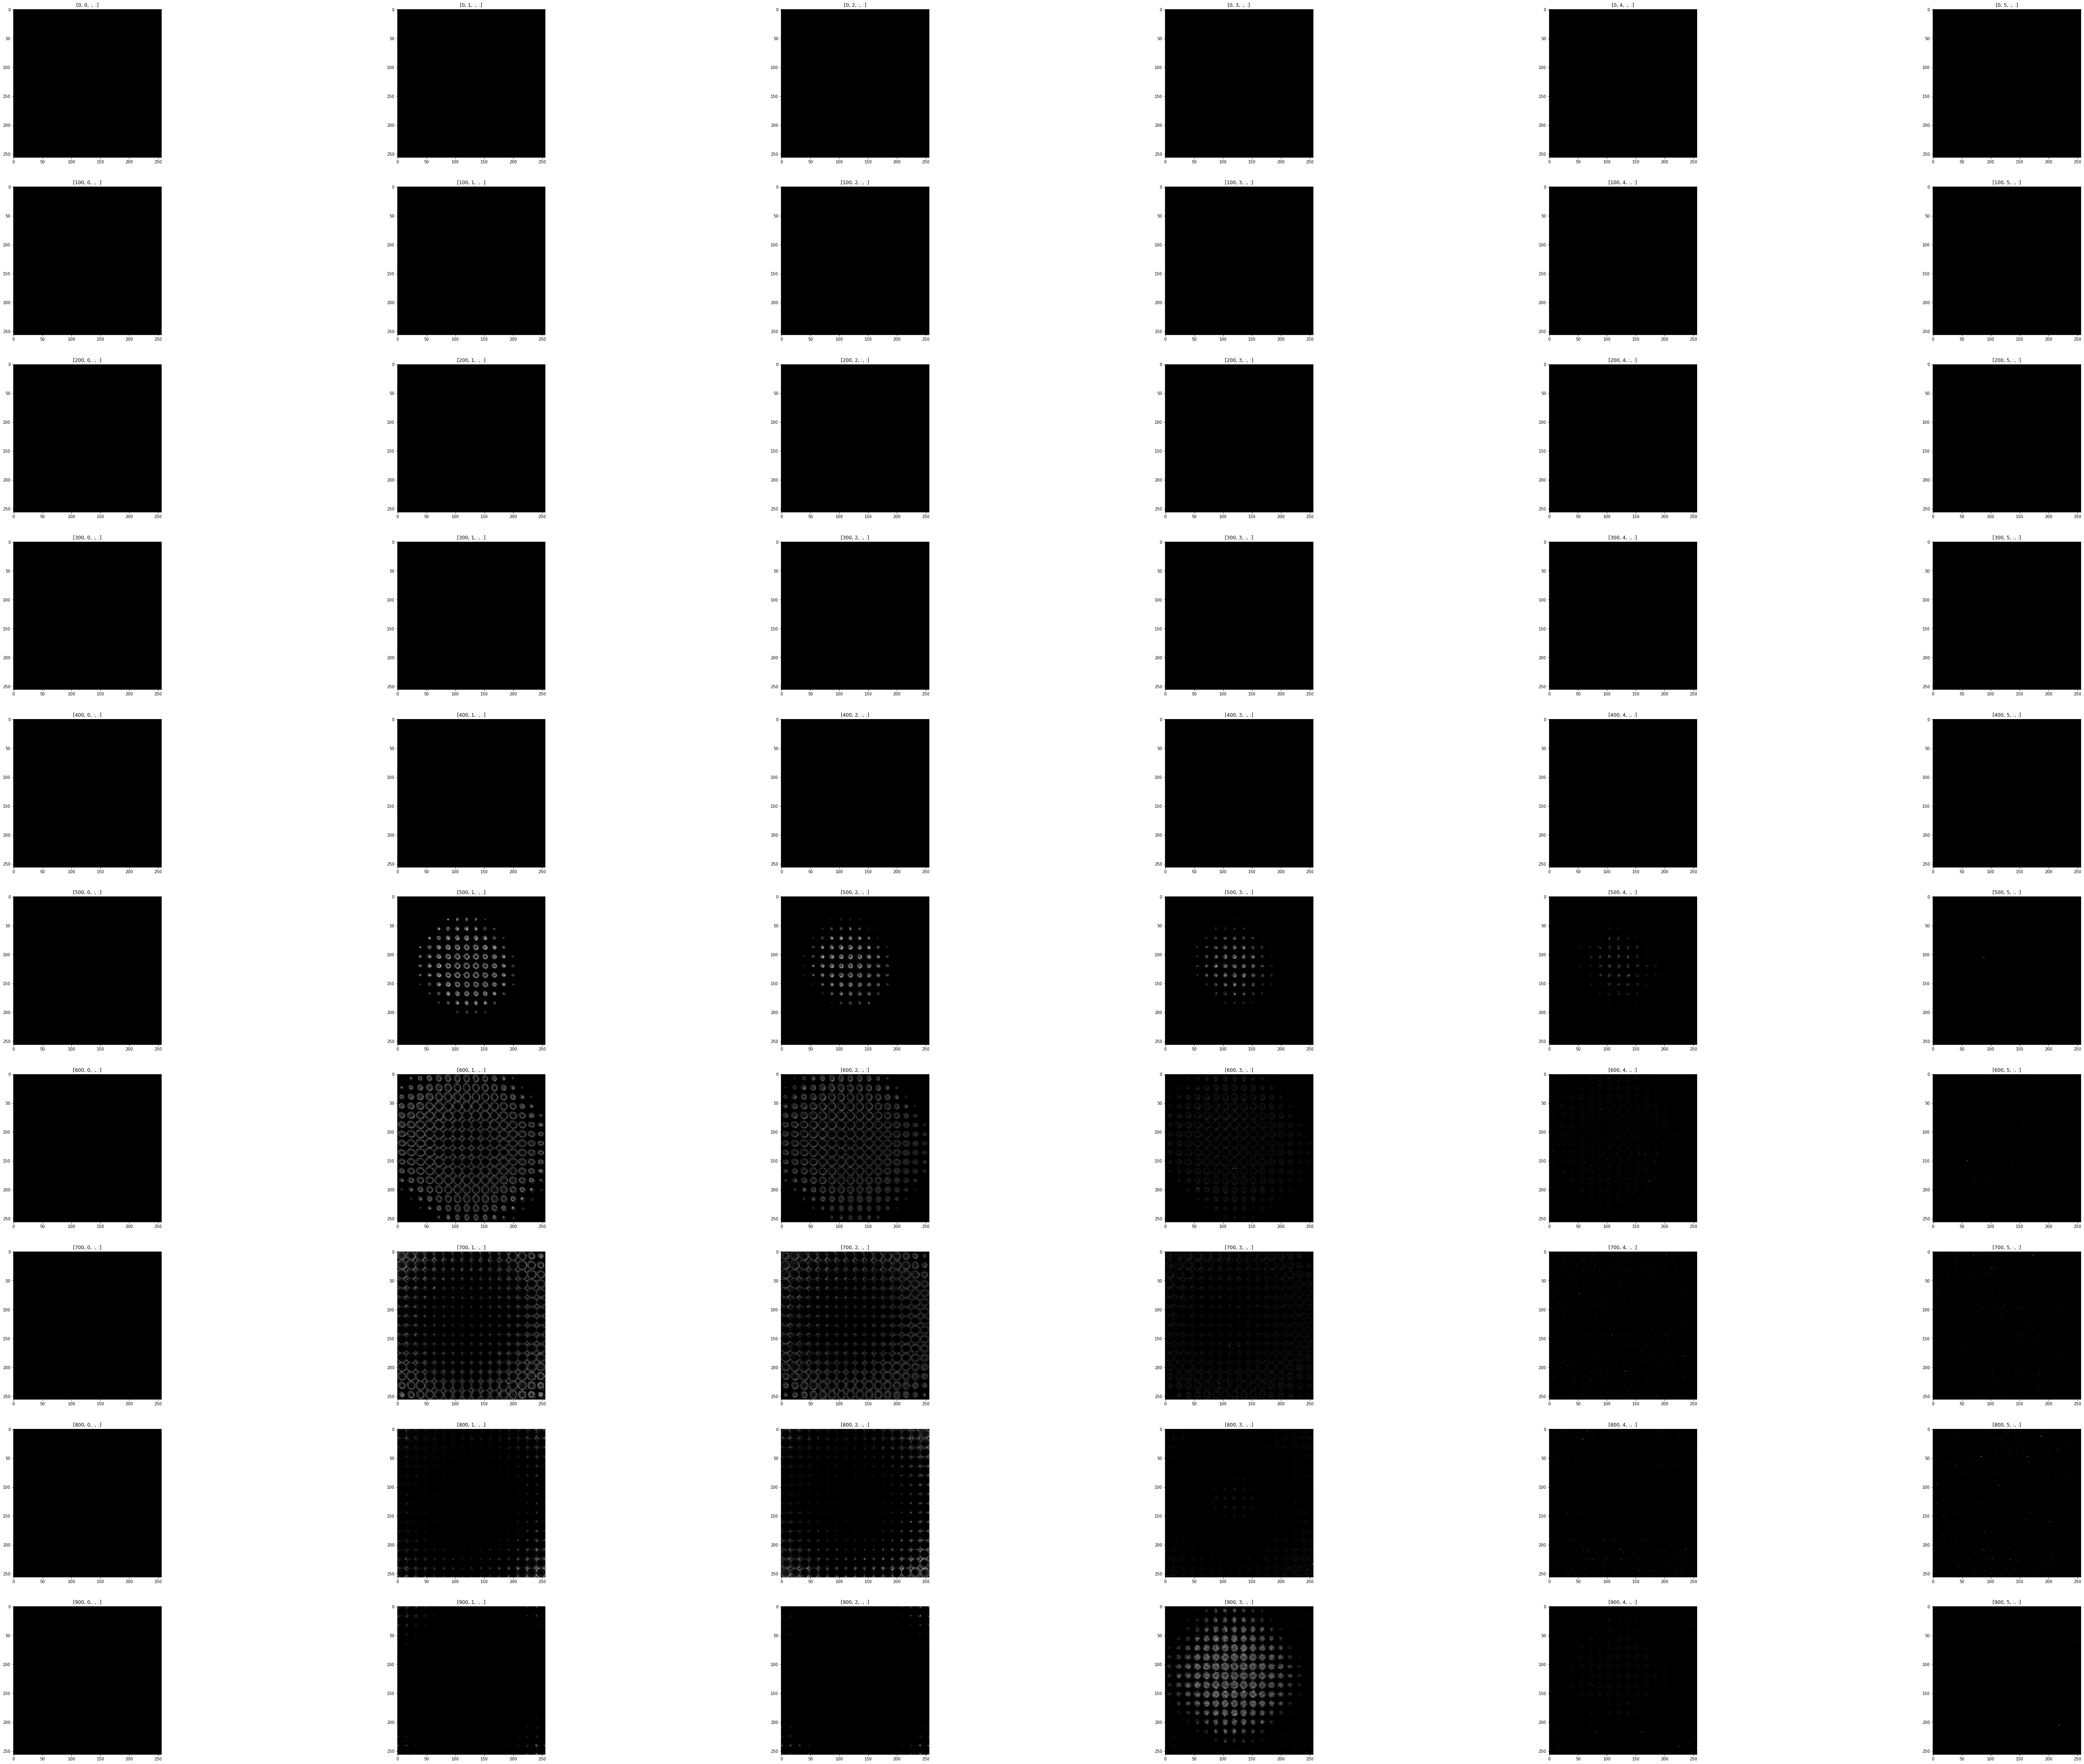

In [40]:
fig = plt.figure()
row_num, col_num = bunny_data.shape[0] // 100, bunny_data.shape[1]
for row in range(row_num):
    for col in range(col_num):
        plt.subplot(row_num, col_num, row * col_num + col + 1)
        plt.title(f"[{100 * row}, {col}, :, :]")
        plt.imshow(bunny_data[100 * row, col], cmap='gray')
# plt.tight_layout()